# Visualização

### Load

In [29]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams, cm
from scipy import signal

def butter_bandpass(data, lowcut, highcut, fs=200, order=4):
    # print(data.shape, data)s
    nyq = fs * 0.5
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='bandpass')
    return signal.filtfilt(b, a, data)

In [30]:
# remix from patriarka
voluntarios, trials, classes, eletrodos, valores = 10, 3, 8, 4, 1600
data = np.empty((voluntarios, trials, classes, eletrodos, valores))

for voluntario in range(voluntarios):
    for trial in range(trials):
        d = np.load(f'./datasets/topicosCC/s{voluntario+1:02d}_{trial+1}.npy')
        d = np.swapaxes(d, -1, -2)
        data[voluntario, trial] = d

np.save('datasets/topicosCC-processed/topicos_cc', data)
print(f'{data.shape} - (voluntarios, trials, classes, eletrodos, valores)')

(10, 3, 8, 4, 1600) - (voluntarios, trials, classes, eletrodos, valores)


### Mesma classe, diferentes trials

~~~~~~~~~~~~~~~~ VOLUNTARIO 6 ~~~~~~~~~~~~~~~~~~


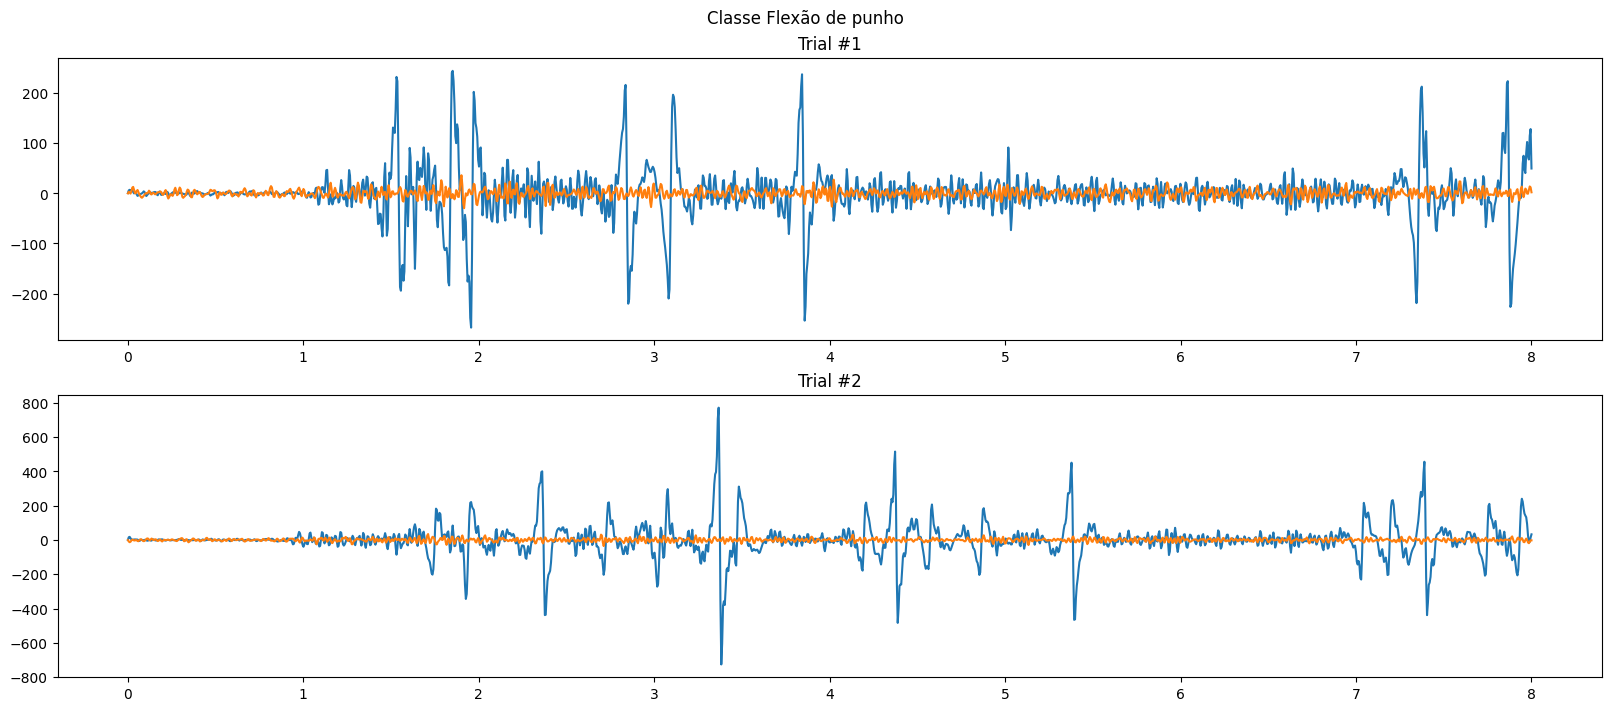

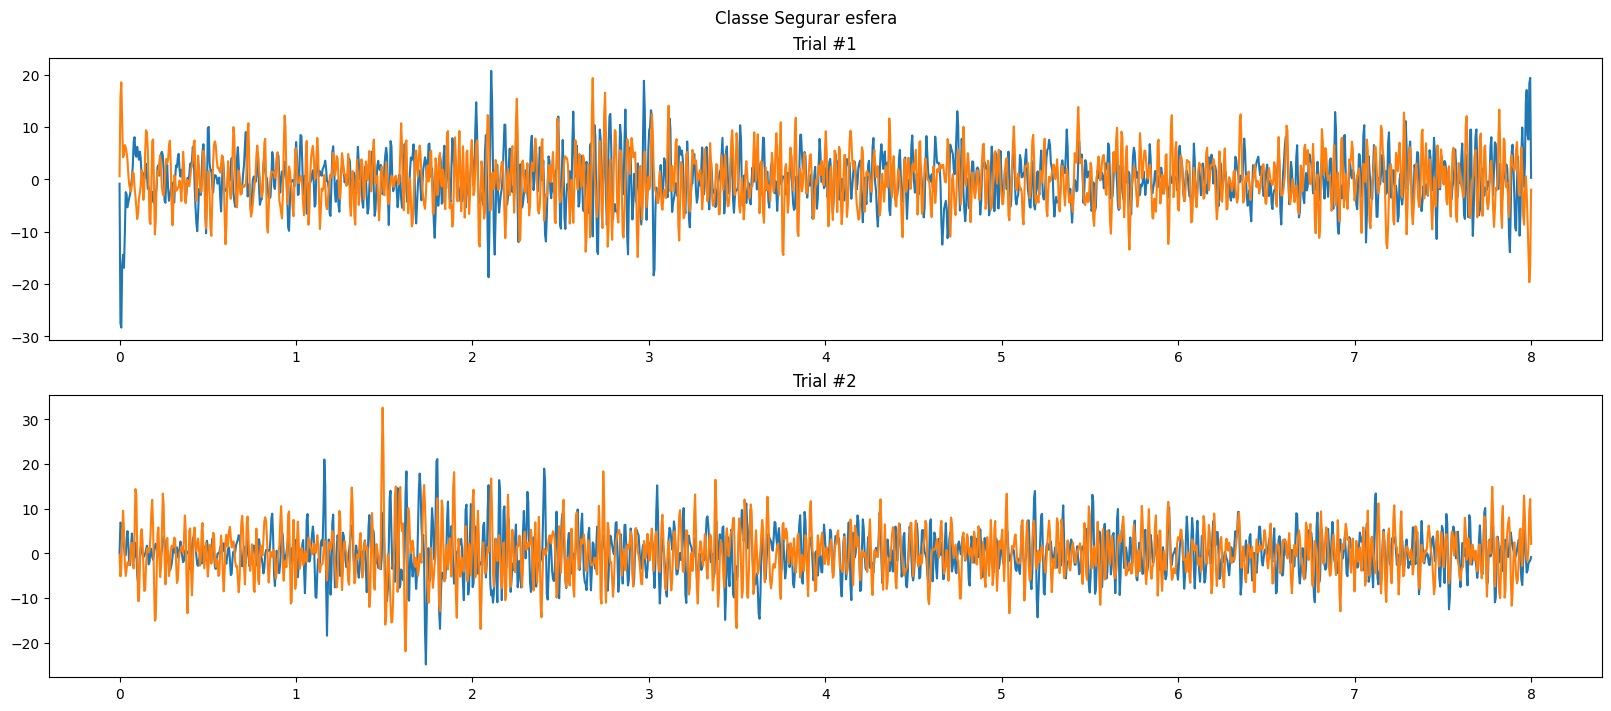

In [31]:
# 2D
# (voluntarios, trials, classes, eletrodos, valores)
# compareTrials(data[voluntario]) -> data = trials, classes, eletrodos, valores
def compareTrials(data, trials=None, classes=None, eletrodos=None):
    if not data.shape:
        data = np.array(data)

    trial = trials if trials else [i for i in range(data.shape[0])]
    classes = classes if classes else [i for i in range(data.shape[1])]
    eletrodos = eletrodos if eletrodos else [i for i in range(data.shape[2])]
    protocol = ['Flexão de punho', 'Extensão de punho', 'Pinça', 'Segurar cartão', 'Segurar caneta', 'Segurar esfera', 'Segurar copo', 'Gancho']
    
    #world params
    x = np.linspace(0, 8, 1600) #de 0 a 8segundos - 1600 pontos
    rcParams['figure.figsize'] = [16., 3.5 * len(trials)]

    for classe in classes:
        fig, axs = plt.subplots(len(trials), 1, constrained_layout=True)        
        ax = [axs] if len(trials) < 2 else axs

        fig.suptitle(f'Classe {protocol[classe]}')

        for i, trial in enumerate(trials):
            for eletrodo in eletrodos:
                bp_data = butter_bandpass(data[trial][classe][eletrodo], 5, 50)
                ax[i].set_title(f'Trial #{trial}')
                ax[i].plot(x, bp_data)

        plt.show()
#end
    
for i, voluntario in enumerate(data):
    if i in [5]: # pra quando nao quiser printar tudo
        print('=================================================')
        print(f'~~~~~~~~~~~~~~~~ VOLUNTARIO {i+1} ~~~~~~~~~~~~~~~~~~')
        print('=================================================')
        compareTrials(voluntario, trials=[1,2], classes=[0,5], eletrodos=[2,3])

~~~~~~~~~~~~~~~~ VOLUNTARIO 2 ~~~~~~~~~~~~~~~~~~


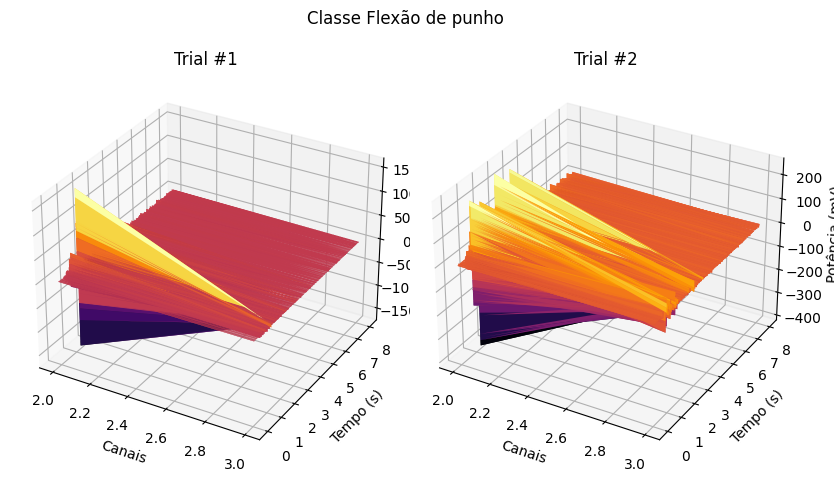

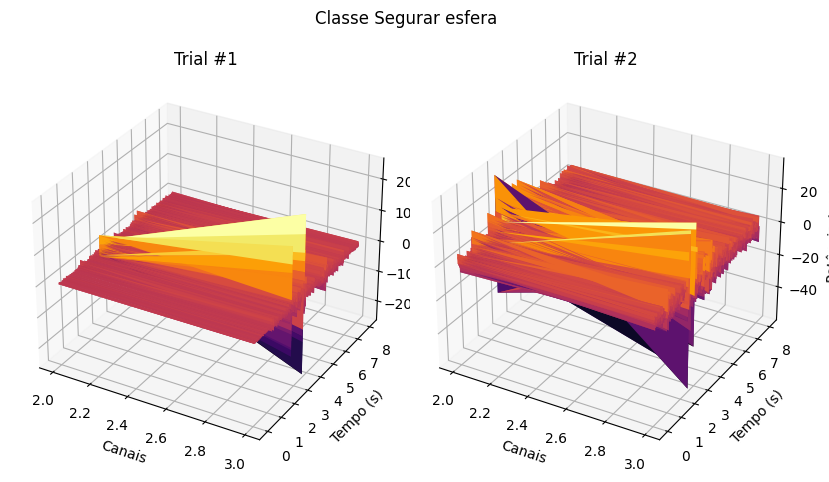

In [32]:
# 3D
# (voluntarios, trials, classes, eletrodos, valores)
# compareTrials(data[voluntario]) -> data = trials, classes, eletrodos, valores
def compareTrials3d(data, trials=None, classes=None, eletrodos=None):
    if not data.shape:
        data = np.array(data)

    trials = trials if trials else [i for i in range(data.shape[0])]
    classes = classes if classes else [i for i in range(data.shape[1])]
    eletrodos = eletrodos if eletrodos else [i for i in range(data.shape[2])]
    protocol = ['Flexão de punho', 'Extensão de punho', 'Pinça', 'Segurar cartão', 'Segurar caneta', 'Segurar esfera', 'Segurar copo', 'Gancho']
    
    rcParams['figure.figsize'] = [4. * len(trials), 5.]

    for classe in classes:
        fig, axs = plt.subplots(1, len(trials), constrained_layout=True, subplot_kw={"projection": "3d"})  
        ax = [axs] if len(trials) < 2 else axs

        fig.suptitle(f'Classe {protocol[classe]}')

        for i, trial in enumerate(trials):
            #plot data
            plot_data = []
            for eletrodo in eletrodos:
                bp_data = butter_bandpass(data[trial][classe][eletrodo], 5, 50)
                for j, time in enumerate(np.linspace(0, 8, 1600)):                    
                    plot_data.append([eletrodo, time, bp_data[j]]) #data = trials, classes, eletrodos, valores
            plot_data = np.array(plot_data)

            #plot
            ax[i].set_title(f'Trial #{trial}')
            ax[i].set_xlabel('Canais')
            ax[i].set_ylabel('Tempo (s)')
            ax[i].set_zlabel('Potência (mV)')
            ax[i].plot_trisurf(plot_data[:,0], plot_data[:,1], plot_data[:,2], antialiased=True, cmap=cm.inferno) #, linewidth=1)

        plt.show()
#end
    
for i, voluntario in enumerate(data):
    if i in [1]: # pra quando nao quiser printar tudo
        print('=================================================')
        print(f'~~~~~~~~~~~~~~~~ VOLUNTARIO {i+1} ~~~~~~~~~~~~~~~~~~')
        print('=================================================')
        compareTrials3d(voluntario, trials=[1,2], classes=[0,5], eletrodos=[2,3])

### Diferentes classes, mesmo trial

~~~~~~~~~~~~~~~~ VOLUNTARIO 1 ~~~~~~~~~~~~~~~~~~


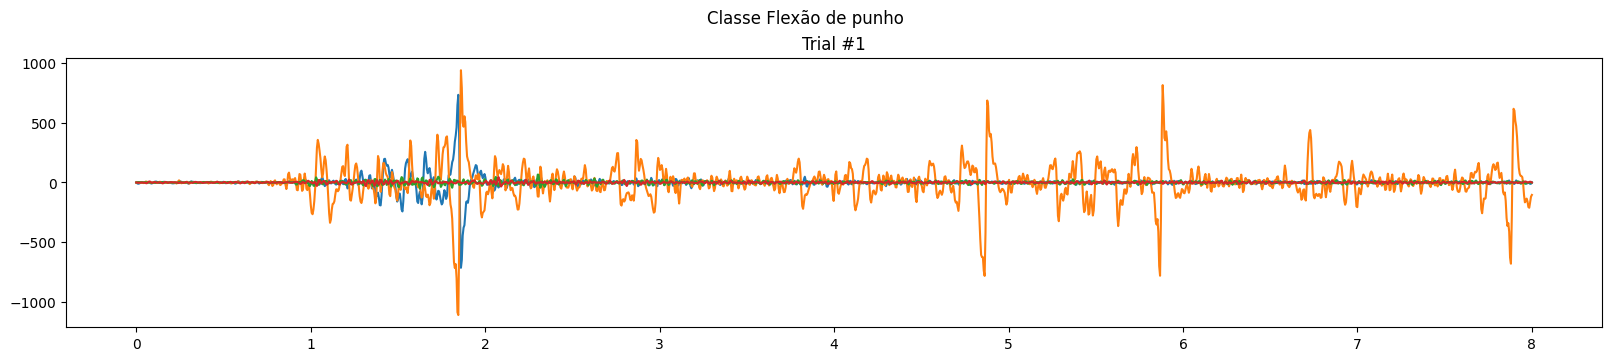

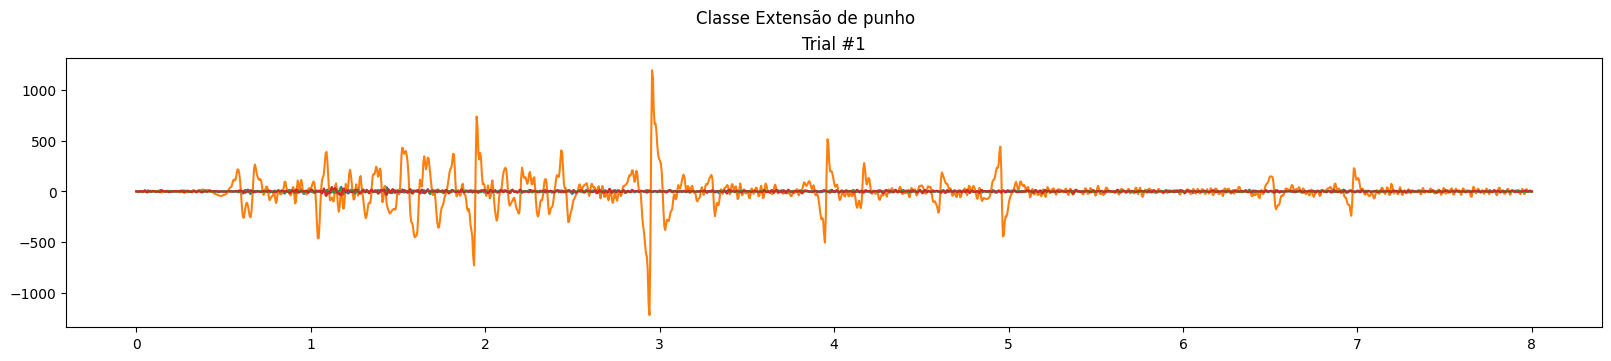

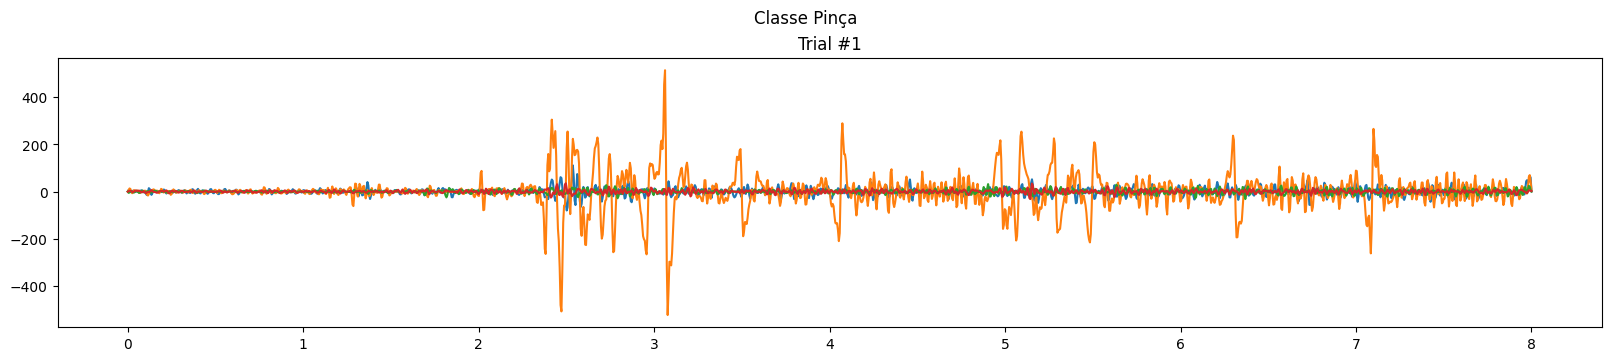

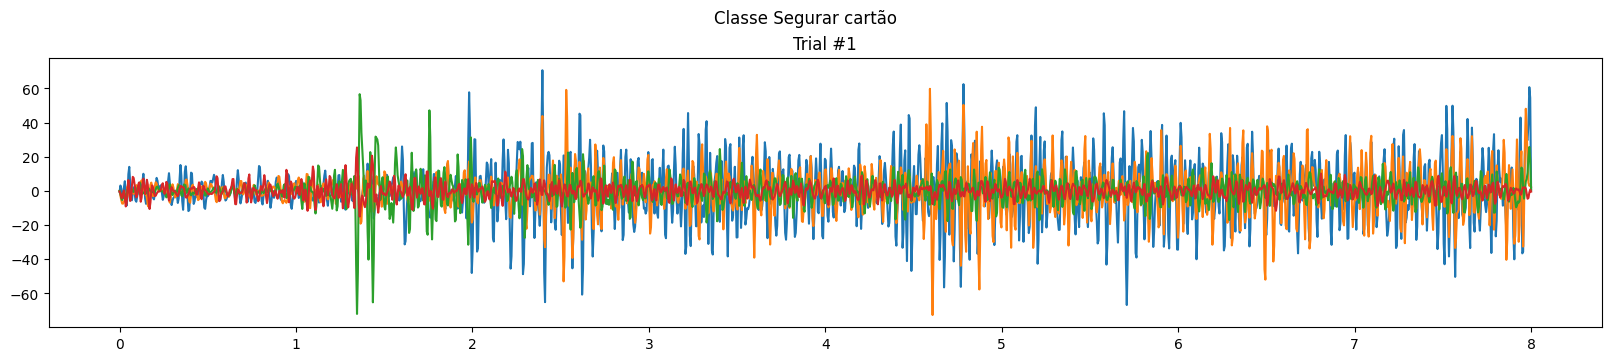

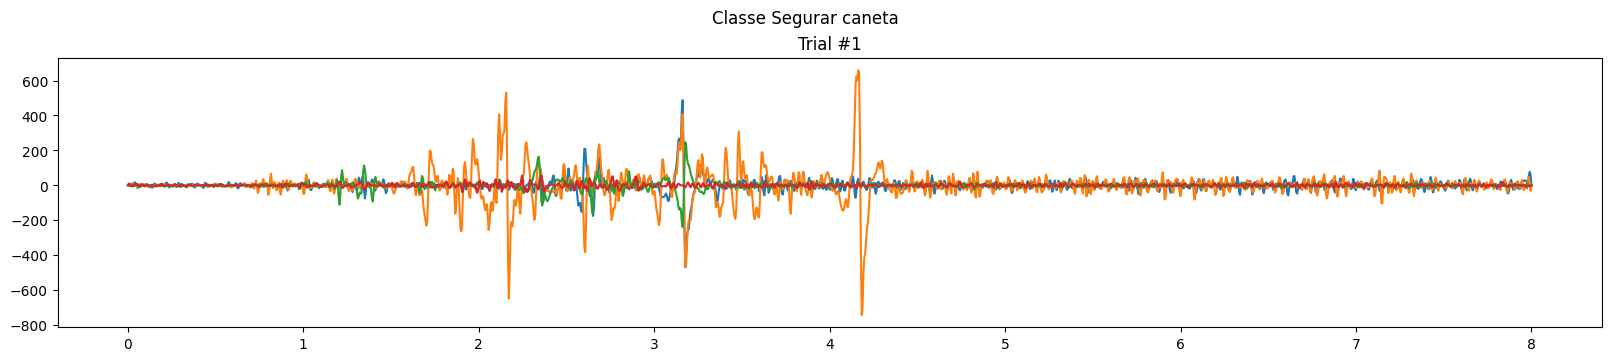

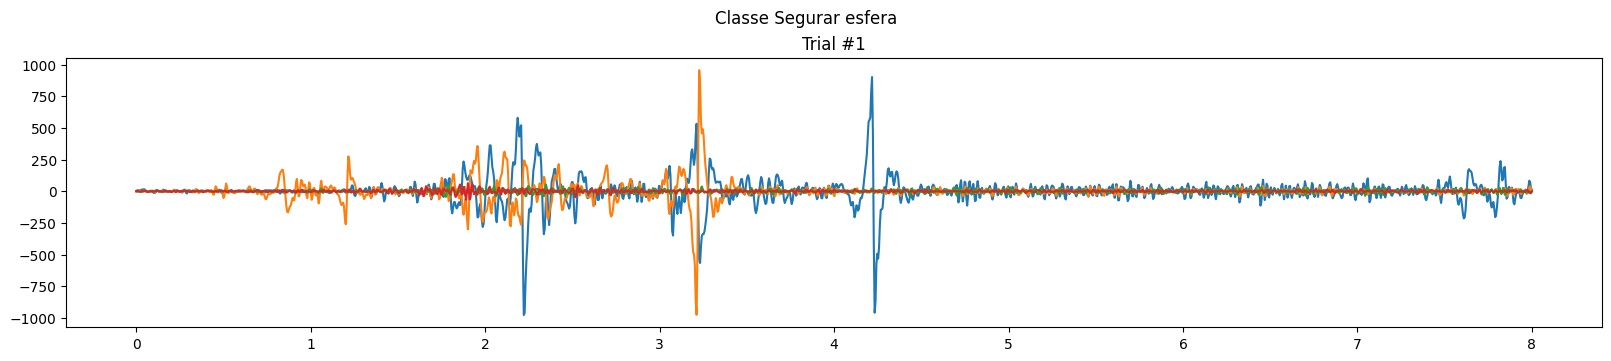

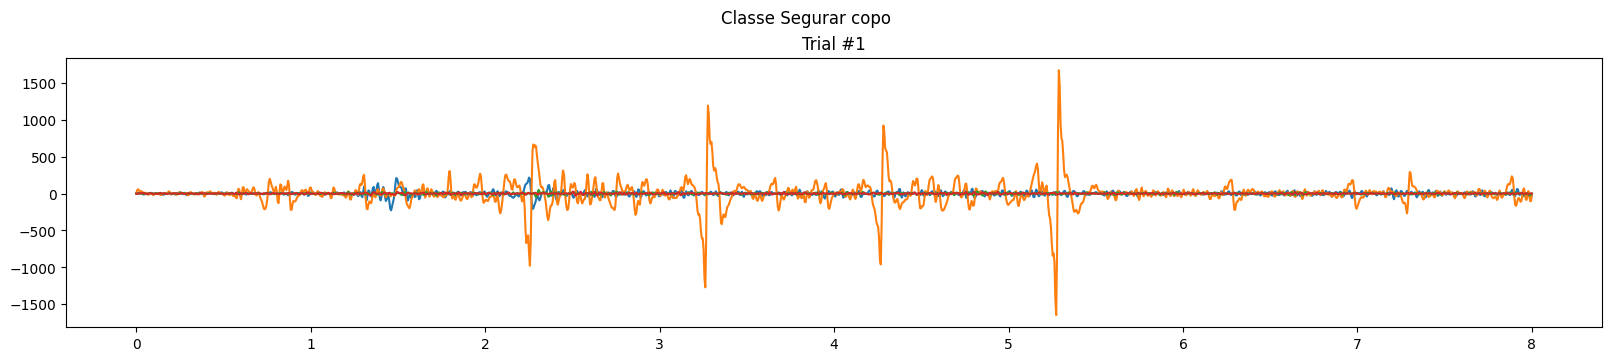

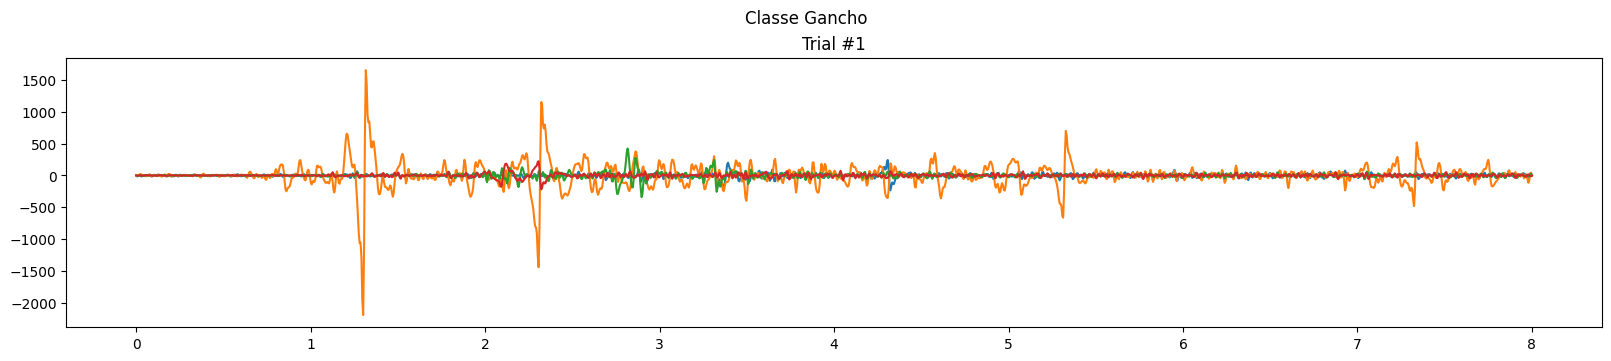

In [33]:
#2D,
for i, voluntario in enumerate(data):
    if i in [0]: # pra quando nao quiser printar tudo
        print('=================================================')
        print(f'~~~~~~~~~~~~~~~~ VOLUNTARIO {i+1} ~~~~~~~~~~~~~~~~~~')
        print('=================================================')

        for trial in range(voluntario.shape[0]):
            if trial in [1]:
                compareTrials(voluntario, trials=[trial])


~~~~~~~~~~~~~~~~ VOLUNTARIO 1 ~~~~~~~~~~~~~~~~~~


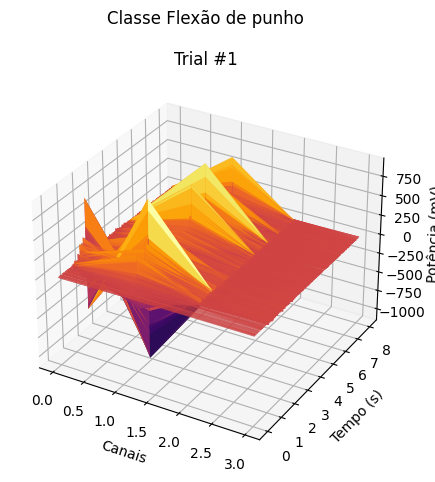

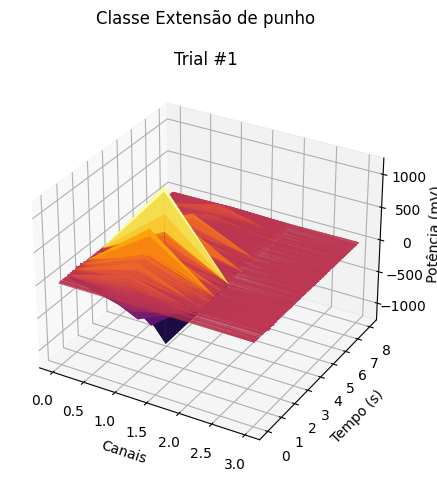

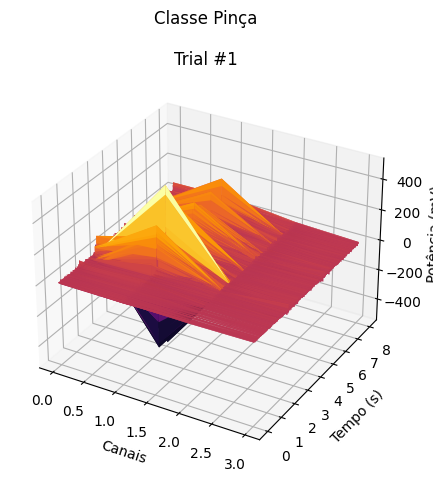

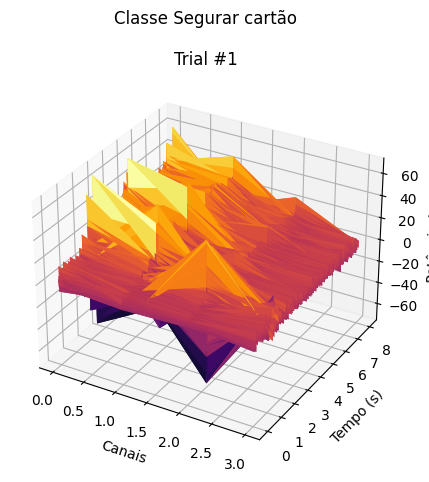

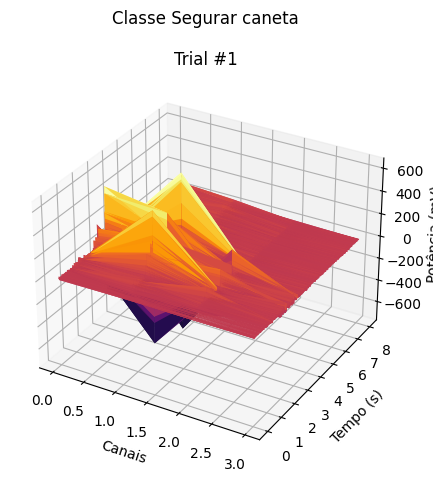

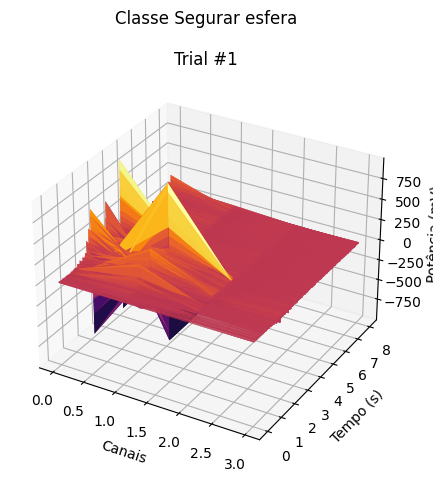

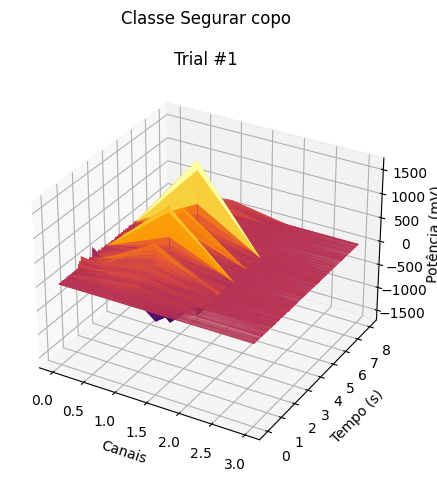

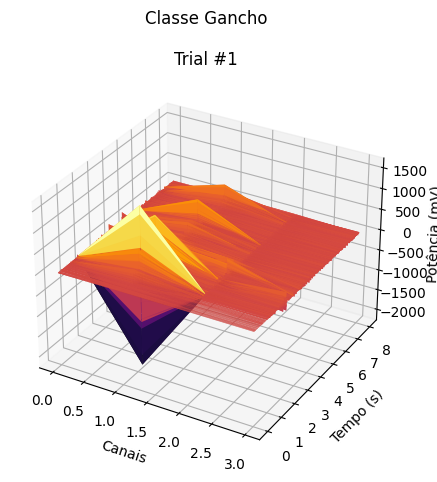

In [34]:
#3D
for i, voluntario in enumerate(data):
    if i in [0]: # pra quando nao quiser printar tudo
        print('=================================================')
        print(f'~~~~~~~~~~~~~~~~ VOLUNTARIO {i+1} ~~~~~~~~~~~~~~~~~~')
        print('=================================================')

        for trial in range(voluntario.shape[0]):
            if trial in [1]:
                compareTrials3d(voluntario, trials=[trial])
